In [1]:
from ime_pylib import scan_tools as sc

import matplotlib.pyplot as plt
import numpy as np
import sympy
import scipy as sp
from scipy.optimize import curve_fit

In [2]:
sc.set_path("./IME_datfiles")

In [3]:
#res=sc.scan_load(615)
res=sc.scan_load(619,623)

#looks only at measurements taken with this command:
#res=sc.scan_load(615,616,top_function="measure_c_bridge_lin)

File: ./IME_datfiles/MKA_000619.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000620.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000621.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000622.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000623.mat loaded . top_function: measure_c_bridge_lin (name identified from number)


In [4]:
res[0]._fieldnames

['logmsg',
 'comment',
 'FileNr',
 'FileName',
 'top_function',
 'time_before',
 'T_before',
 'C_bridge',
 'fr_bridge',
 'time_after',
 'T_after']

/home/user00/Programs/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


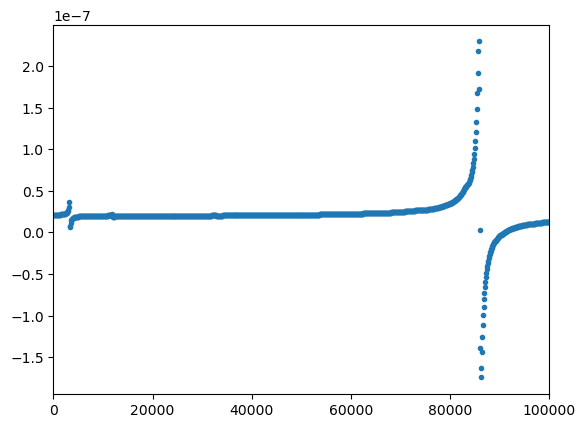

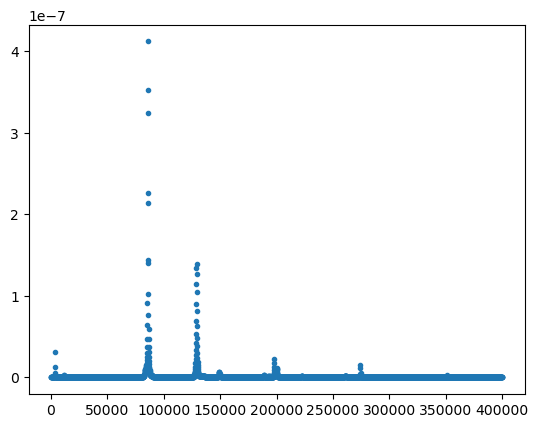

In [5]:
plt.plot(res[0].fr_bridge,res[0].C_bridge,'.')
plt.xlim(0,100000)
plt.show()
plt.plot(res[0].fr_bridge,-res[0].C_bridge.imag,'.')

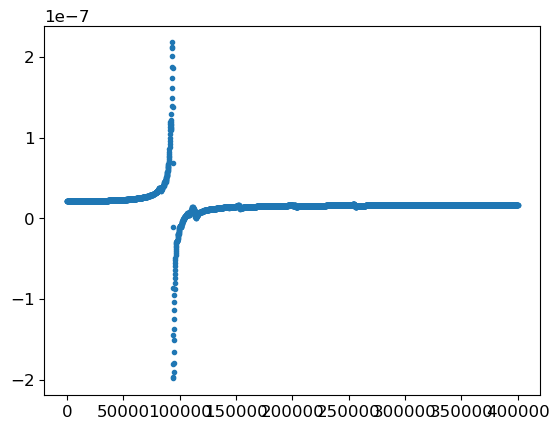

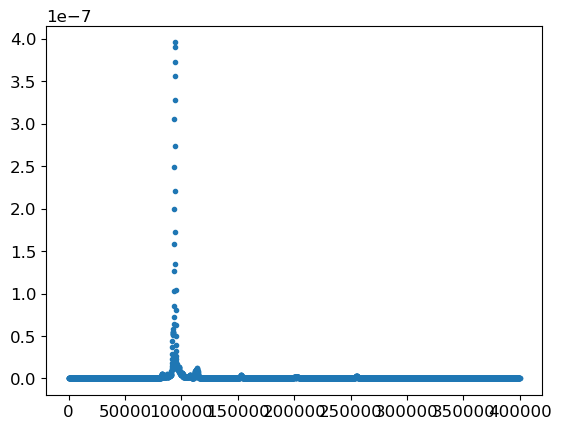

In [12]:
plt.plot(res[4].fr_bridge,res[4].C_bridge,'.')
plt.show()
plt.plot(res[4].fr_bridge,-res[4].C_bridge.imag,'.')

In [81]:
def model(f, C1, C2, L, R):
    w = 2*np.pi*f
    return C1 + 1 / (1/C2 - w**2*L + 1j*w*R)

def fit_func(fdata, *args):
    l = model(fdata, *args)
    return np.abs(l)

def fit(fdata, Cdata, p0):
    Cdata_real = np.abs(Cdata)
    popt, _ = curve_fit(fit_func, fdata, Cdata_real, p0)
    return popt

def makefits(data, p0):
    C_fit = np.zeros_like(data)
    popt_data = np.zeros_like(data)
    
    for i in range(0, len(data)):
        # find values for parameters
        popt_data[i] = fit(data[i].fr_bridge, data[i].C_bridge, p0)
        
        # the model sometimes comes up with negative values for a parameter
        # Since we know they are all positive, this always corrects that
        popt_data = np.abs(popt_data)
        
        # find the ydata for the fit to plot it later
        C_fit[i] = model(data[i].fr_bridge, *popt_data[i])
        
        #this is to double check if the values make sense
        #print(popt_data[i])
    return C_fit, popt_data

In [197]:
def other_model(f, Cinf, C0, f0, Q):
    x = f/f0
    return Cinf + (C0-Cinf)/(1 - x**2 + 1j*x/Q)

def other_fit_func(fdata, *args):
    l = other_model(fdata, *args)
    return np.abs(l)

def other_fit(fdata, Cdata, p0):
    Cdata_real = np.abs(Cdata)
    popt, _ = curve_fit(other_fit_func, fdata, Cdata_real, p0)
    return popt

def other_makefits(data, p0):
    C_fit = np.zeros_like(data)
    popt_data = np.zeros_like(data)
    
    for i in range(0, len(data)):
        # find values for parameters
        popt_data[i] = other_fit(data[i].fr_bridge, data[i].C_bridge, p0)
        
        # the model sometimes comes up with negative values for a parameter
        # Since we know they are all positive, this always corrects that
        popt_data = np.abs(popt_data)
        
        # find the ydata for the fit to plot it later
        C_fit[i] = other_model(data[i].fr_bridge, *popt_data[i])
        
        #this is to double check if the values make sense
        #print(popt_data[i])
    return C_fit, popt_data

In [198]:
p0 = 2.1e-8, 1.7e-9, 9.3e-6, 1000

Cinf_0 = 1.7e-8
C0_0 = 2e-8
f0_0 = 9.3e4
Q_0 = 100

p1 = Cinf_0, C0_0, f0_0, Q_0
p2 = 1.7e-8, 2.1e-8, 9.3e4, 100
Jfit, popt = makefits(res, p0)
Jfit1, popt1 = other_makefits(res, p1)

print(popt[4][0], popt1[4][0])
print(popt[4][1], popt1[4][1])
print(popt[4][2], popt1[4][2])
print(popt[4][3], popt1[4][3])

TypeError: bad operand type for abs(): 'function'

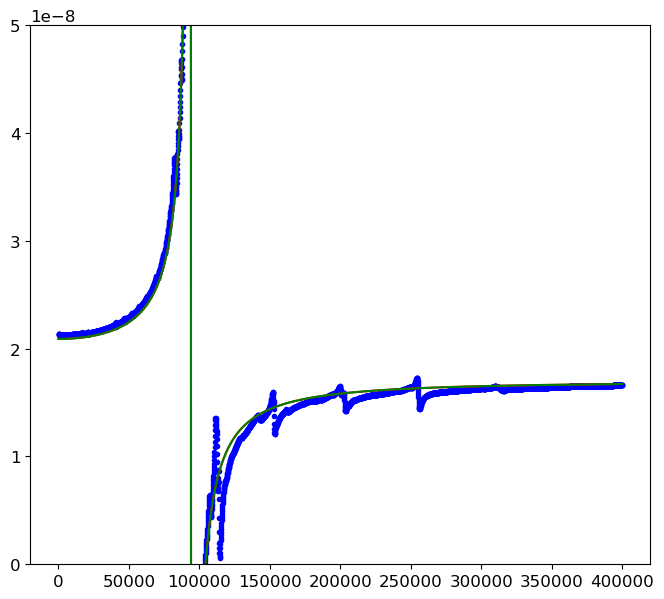

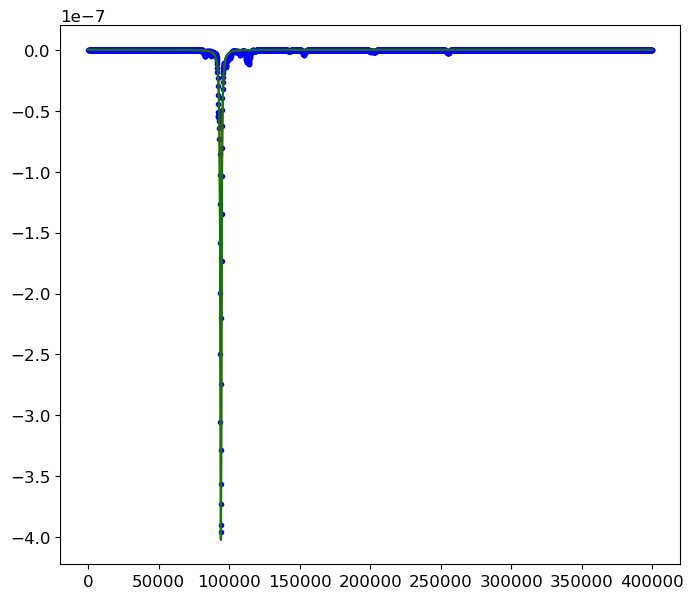

In [201]:
'''#initial values
plt.plot(res[0].fr_bridge, np.real(res[0].C_bridge),'.b')
y = model(res[0].fr_bridge, 1.e-8, 1.e-8, 25.e-5, 10)
plt.plot(res[0].fr_bridge, y, '-r')
plt.show()
'''
# real data+fit
plt.rc('font', size=12)
plt.figure(figsize=(8,7))

plt.plot(res[4].fr_bridge, np.real(res[4].C_bridge),'.b')
plt.plot(res[4].fr_bridge, np.real(Jfit[4]), '-r')
plt.plot(res[4].fr_bridge, np.real(Jfit1[4]), '-g')
plt.ylim(0,5e-8)
#plt.xlim(8e4,1e5)
plt.show()

# imag data+fit
plt.rc('font', size=12)
plt.figure(figsize=(8,7))

plt.plot(res[4].fr_bridge, np.imag(res[4].C_bridge),'.b')
plt.plot(res[4].fr_bridge, np.imag(Jfit[4]), '-r')
plt.plot(res[4].fr_bridge, np.imag(Jfit1[4]), '-g')


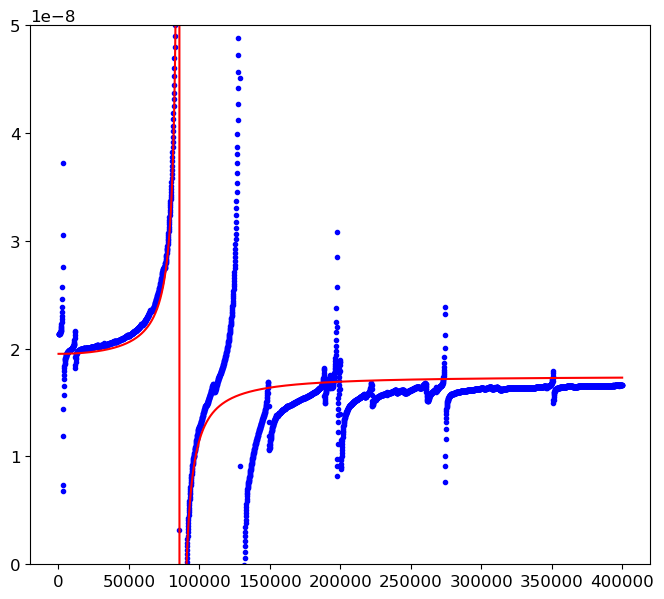

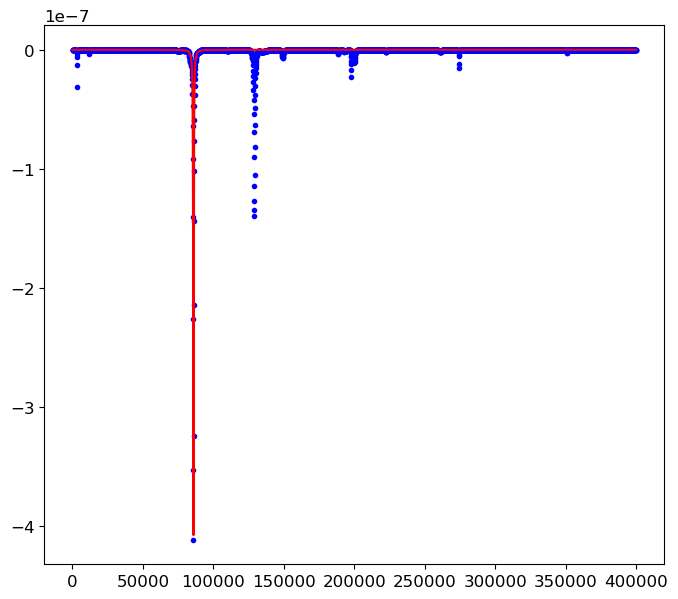

In [10]:
# real data+fit
plt.rc('font', size=12)
plt.figure(figsize=(8,7))

plt.plot(res[0].fr_bridge, np.real(res[0].C_bridge),'.b')
plt.plot(res[0].fr_bridge, np.real(Jfit[0]), '-r')
plt.plot(
plt.ylim(0,5e-8)
#plt.xlim(8e4,1e5)
plt.show()

# imag data+fit
plt.rc('font', size=12)
plt.figure(figsize=(8,7))

plt.plot(res[0].fr_bridge, np.imag(res[0].C_bridge),'.b')
plt.plot(res[0].fr_bridge, np.imag(Jfit[0]), '-r')


(1e-08, 3e-08)

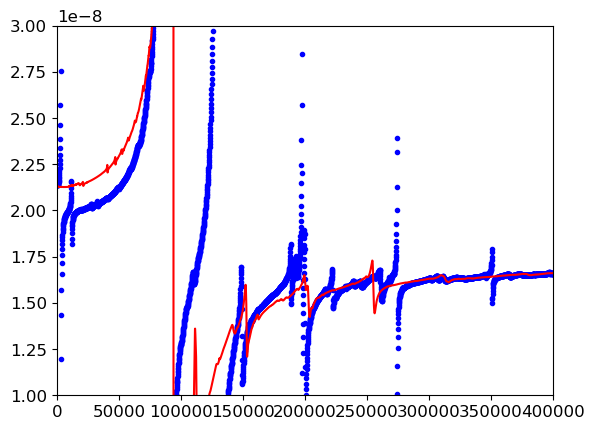

In [11]:
plt.plot(res[0].fr_bridge,res[0].C_bridge,'.b')
plt.plot(res[4].fr_bridge,res[4].C_bridge,'-r')
plt.xlim(0,400000)
plt.ylim(10.e-9,30e-9)

In [13]:
res=sc.scan_load(619,629)
#19 [0]: squalane
#20 no
#21 no
#22 no
#23 [4]: empty
#24 no
#25 no
#26 no
#27 no
#28 no
#29 [10]: water

File: ./IME_datfiles/MKA_000619.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000620.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000621.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000622.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000623.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000624.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000625.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000626.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IME_datfiles/MKA_000627.mat loaded . top_function: measure_c_bridge_lin (name identified from number)
File: ./IM

(1.5e-08, 2.5e-08)

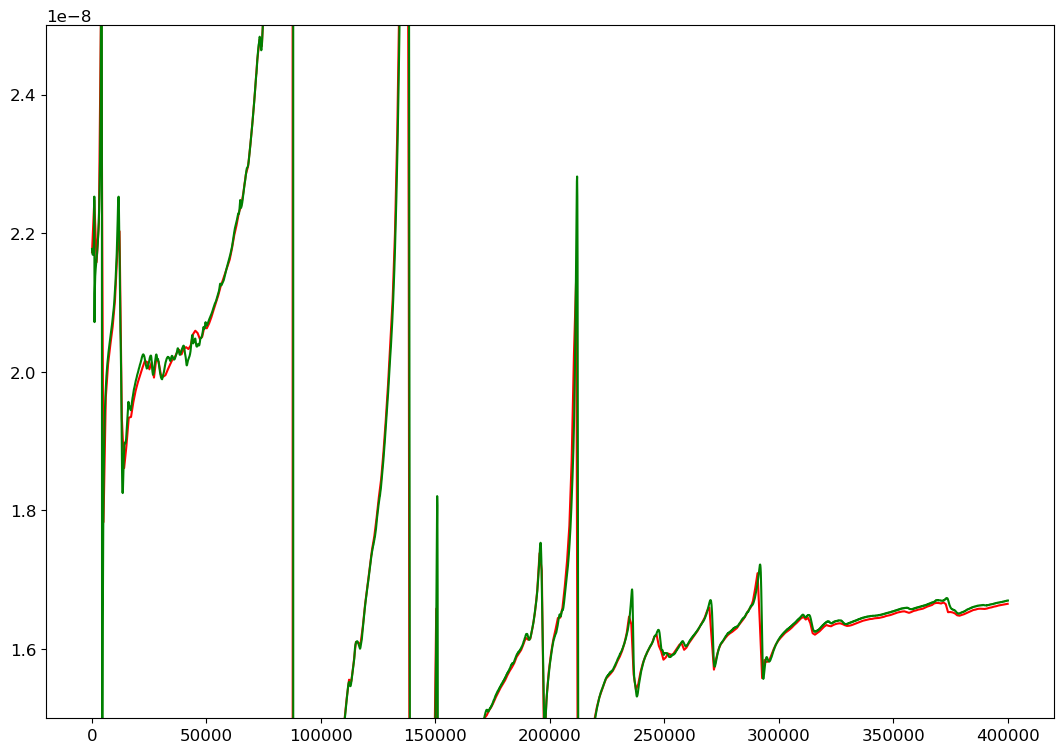

In [15]:
plt.figure(figsize=(13,9))
#plt.plot(res[5].fr_bridge,res[5].C_bridge,'-b') # 1st fill  (400 datapoints)
#plt.plot(res[7].fr_bridge,res[7].C_bridge,'-r') # 2nd fill  (400 datapoints)
#plt.plot(res[8].fr_bridge,res[8].C_bridge,'-g')  # 3rd fill  (400 datapoints)
#plt.plot(res[1].fr_bridge,res[1].C_bridge,'-r') # empty     (4000 datapoints)
#plt.plot(res[0].fr_bridge,res[0].C_bridge,'-r') # squalane  (4000 datapoints)
plt.plot(res[9].fr_bridge,res[9].C_bridge,'-r')  # 4th fill  (400 datapoints)
plt.plot(res[10].fr_bridge,res[10].C_bridge,'-g')  # 4th fill  (4000 datapoints)

#plt.xlim(0,90e3)
plt.ylim(15e-9,25e-9)
#plt.xlim(90e3,300e3)
#plt.ylim(5e-9,3e-8)

# define and plot normalized capacitance

$$F(f) = \frac{C_m(f) - C_\infty}{C_0 - C_\infty}$$

In [204]:
def normcap(Cm,Cinf,C0):
    return (Cm - Cinf)/(C0 - Cinf)

In [205]:
Fempty = normcap(res[0].C_bridge, popt1[0][0], popt1[0][1])
Fwater = normcap(res[4].C_bridge, popt1[4][0], popt1[4][1])

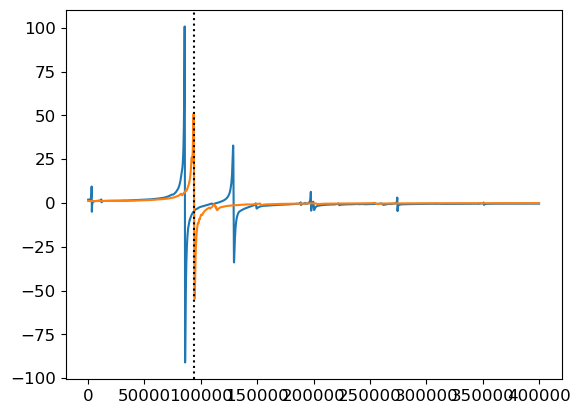

In [224]:
#plt.figure(figsize=(11,12))
plt.plot(res[0].fr_bridge, Fempty)
plt.plot(res[4].fr_bridge, Fwater)
plt.axvline(popt1[4][2], linestyle=':', color='k')

# define and plot stiffness/bulk modulus

$$S_{\mathrm{liq}} = L \omega_0^2 \left( \frac{1}{F(\omega)} - 1 + \left( \frac{\omega}{\omega_0} \right)^2 - i \frac{\omega}{\omega_0} \frac{1}{Q} \right)$$

In [209]:
m = 0.00462
r0 = 0.0095
L = m/(4*np.pi*(r0**2))**2
V = (4/3)*np.pi*(r0**3)

def stiffness(f, f0, L, Q, F):
    return L*((2*np.pi*f0)**2)*((1/F) - 1 + (f/f0)**2 - 1j*(f/f0)*(1/Q))

In [212]:
Sempty = stiffness(res[0].fr_bridge, popt1[0][2], L, popt1[0][3], Fempty)
Swater = stiffness(res[4].fr_bridge, popt1[4][2], L, popt1[4][3], Fwater)

Kwater = Swater * V

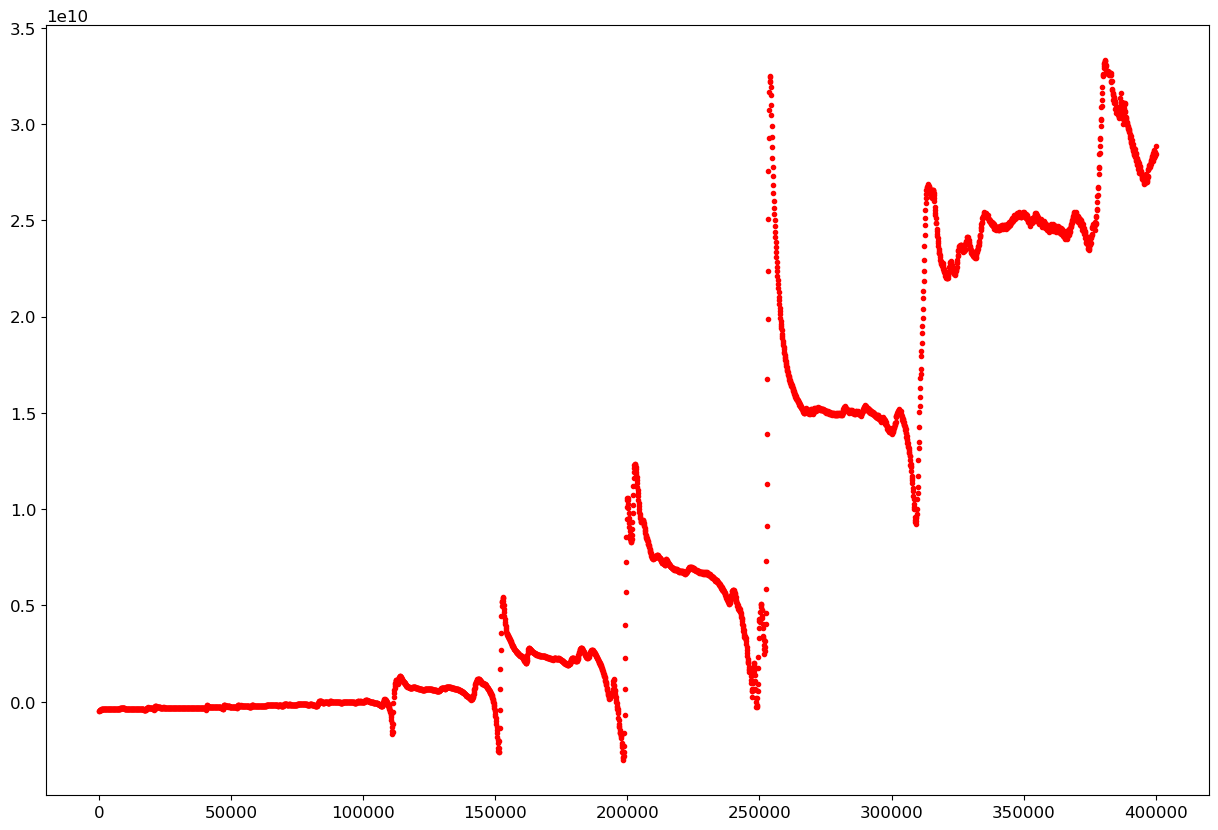

In [218]:
plt.figure(figsize=(15,10))
plt.plot(res[4].fr_bridge, np.real(Kwater), '.r')

#plt.ylim(0e9, 4e9)
#plt.xlim(8e4, 25e4)

## function for fitting stiffness stuff

$$S(\omega) = \frac{K}{V} g\left( \frac{\omega}{\omega_r} \right) \mathrm{where}\  g(x) = -\frac{1}{3} \frac{x^2 \sin x}{x \cos x - \sin x} +2/3 \ ,\ \omega_r = \sqrt{ \frac{K}{\rho} } \frac{1}{r_0}$$

$$ \Rightarrow S(\omega) = - \frac{K}{4*\pi*r^3} \left(\frac{ x^2 \sin (x)}{x \cos (x) - \sin (x)} +2/3 \right)\ ,\ x=\frac{\omega}{\omega_r} = \frac{\omega}{\sqrt{K/\rho}} *r_0 $$


In [219]:
# define stiffness
def stiffmodel(f, K, fr):
    x = f/fr
    return (-K/(4*np.pi*(0.0095)**3))*(((x**2)*np.sin(x))/(x * np.cos(x) - np.sin(x)))

In [ ]:
p0 = Kwater, 2.5e4
S_guess =  stiffmodel(res[4].fr_bridge, *p0)
popt_S300 = other_fit(res[4].fr_bridge[15:105], Swater[15:105], stiffmodel, p0)
S_fit300 = stiffmodel(res[4].fr_bridge, *popt_S300)

print(popt_S300)